<a href="https://colab.research.google.com/github/mantrala1/DataScienceprojects/blob/master/linear_regression_cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os as os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

os.chdir('/Users/sriharithamantrala/Desktop/AIML/linear_regression_supervised_learning')

# Read csv file
cars = pd.read_csv(r'used_cars_data.csv')

In [ ]:
# Read column level information
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',200)

cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7078 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [ ]:
# get the shape of dataset cars.shape
cars.shape

(7253, 14)

In [ ]:
# Display 10 rows at random

cars.sample(n=10)


,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
1343,1343,Honda CR-V 2.4L 4WD AT,Pune,2015,63050,Petrol,Automatic,First,11.1 kmpl,2354 CC,158.8 bhp,5.0,NaN,17.50
679,679,Maruti Ciaz VDI SHVS,Kochi,2017,41217,Diesel,Manual,First,28.09 kmpl,1248 CC,88.5 bhp,5.0,NaN,7.40
3389,3389,Audi A6 2.0 TDI Design Edition,Kolkata,2012,27090,Diesel,Automatic,First,18.53 kmpl,1968 CC,187.74 bhp,5.0,NaN,16.50
4692,4692,Honda City i-VTEC S,Mumbai,2015,10400,Petrol,Manual,First,17.4 kmpl,1497 CC,117.3 bhp,5.0,NaN,6.51
4026,4026,Maruti Alto K10 VXI,Jaipur,2016,51264,Petrol,Manual,First,24.07 kmpl,998 CC,67.1 bhp,5.0,4.24 Lakh,3.20
6942,6942,Mercedes-Benz New C-Class C 250 CDI Elegance,Pune,2010,65505,Diesel,Automatic,First,14.94 kmpl,2143 CC,204 bhp,5.0,NaN,NaN
5667,5667,Honda Amaze S i-Vtech,Coimbatore,2015,53497,Petrol,Manual,First,18.0 kmpl,1198 CC,86.7 bhp,5.0,NaN,5.45
1801,1801,Tata Nano Lx BSIV,Kochi,2012,4187,Petrol,Manual,First,26.0 kmpl,624 CC,35 bhp,4.0,NaN,1.38
825,825,Volkswagen Ameo 1.5 TDI Highline,Mumbai,2017,51000,Diesel,Manual,First,21.66 kmpl,1498 CC,108.62 bhp,5.0,10.04 Lakh,6.45
5209,5209,Mahindra XUV500 AT W10 FWD,Hyderabad,2016,80999,Diesel,Automatic,First,16.0 kmpl,2179 CC,140 bhp,7.0,NaN,14.40


Quick Observations :
1) S.No. Column is not a useful column and can be dropped
2) Mileage, Engine, Power has characters like kmpl,CC,bhp at the end of their values that need to be standardized and stripped.
3) Price appears to be missing for 3 or 10 sample rows while New_Price is missing for 9 out 10 sample rows, indicating sparsely populated data.

In [ ]:
# Display null columns
cars.isnull().sum()

# New price attribute has significant data missing.


S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price            6247
Price                1234
dtype: int64

In [ ]:

# Drop the variable S.No.
cars.drop('S.No.', axis=1, inplace=True)

###### UNIVARIATE ANALYSIS of variables.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Location', ylabel='count'>

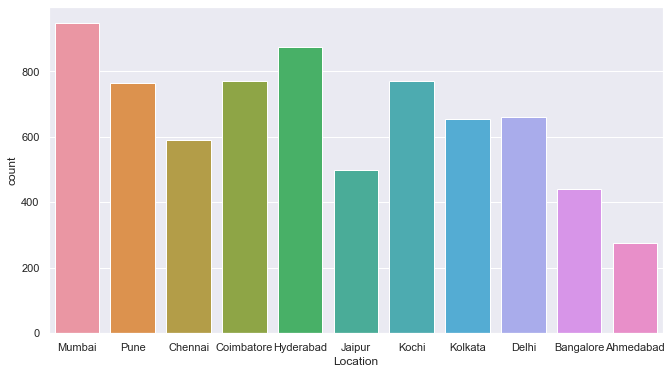

In [ ]:
%matplotlib inline
sns.set(rc={'figure.figsize':(11,6)})
sns.countplot(cars['Location'] )

# Mumbai and Hyderabad are the locations with higher sales of used cars.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Year', ylabel='count'>

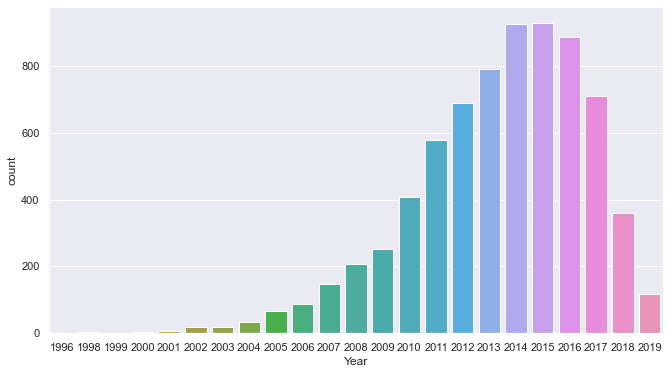

In [ ]:
sns.set(rc={'figure.figsize':(11,6)})
sns.countplot(cars['Year'])

# Car make year data is skewed towards recent years. Bulk of the the sales (7) are based on cars that were manufactured
# after 2010

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Owner_Type', ylabel='count'>

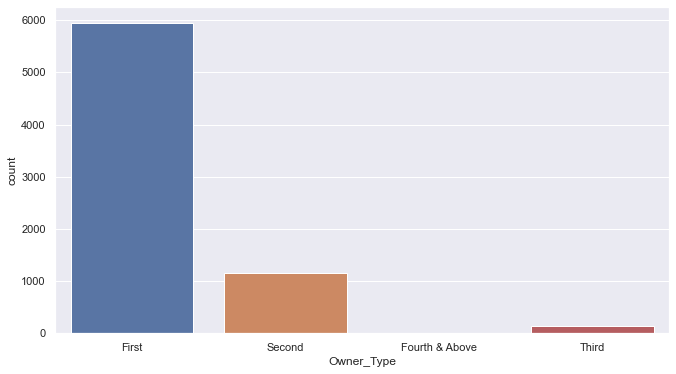

In [ ]:
sns.countplot(cars['Owner_Type'])
# Most of the Owners are First time owners

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Transmission', ylabel='count'>

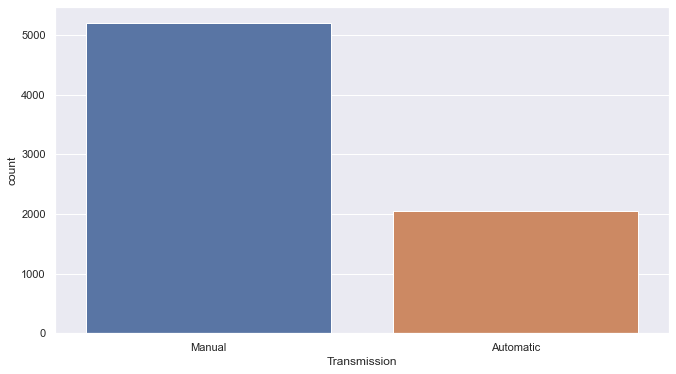

In [ ]:
sns.set(color_codes=True)
sns.countplot(cars['Transmission'])
# The number of cars with manual transmission is higher then the number of cars with automatic transmission


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Seats', ylabel='count'>

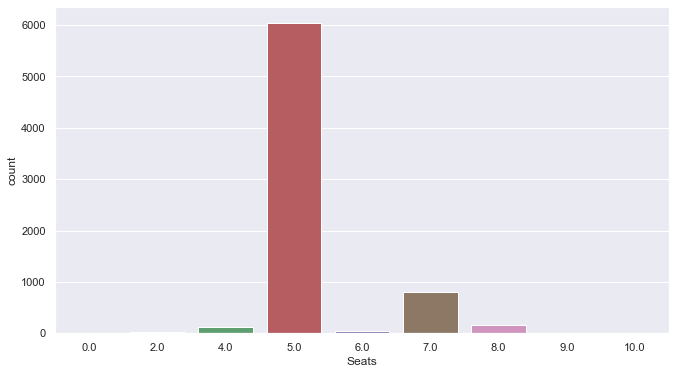

In [ ]:

sns.countplot(cars['Seats'])

# 5 seater cars tops the sales volume followed by 7 seater cars.

In [ ]:
# Create a column indicating the Brand  of car
cars['Brand']=cars['Name'].str.split(' ').str[0] + ' ' + cars['Name'].str.split(' ').str[1]

# Maruti Swift is the highest selling car , followed by Honda City and Hyindai I20. 
#is the highest selling brand followed by Hyundai.
cars['Brand'].value_counts()

Maruti Swift            418
Honda City              318
Hyundai i20             303
Toyota Innova           203
Hyundai Verna           200
                       ... 
Porsche Boxster           1
Mini Countryman           1
OpelCorsa 1.4Gsi          1
Jaguar F                  1
Lamborghini Gallardo      1
Name: Brand, Length: 223, dtype: int64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Transmission', ylabel='Price'>

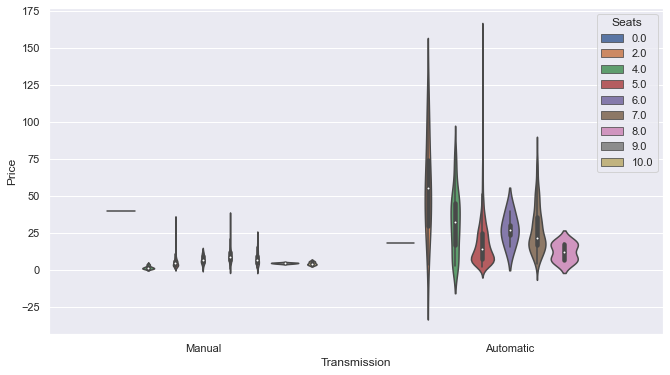

In [ ]:
sns.violinplot(cars['Transmission'], cars['Price'], hue=cars['Seats'])

##### Most of the manual cars have similar median price value, and the interquartile distribition is smaller
Automatic cars have larger interquartile distribution of price.  In particular , 2 seater  and 4 seater cars appear to have a higher median price compared to the rest. These are most likely luxury segment cars.


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Transmission', ylabel='Price'>

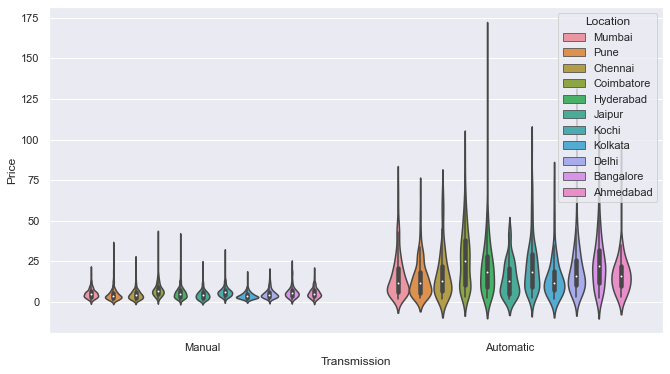

In [ ]:
sns.violinplot(cars['Transmission'], cars['Price'], hue=cars['Location'])

###### Coimbatore has the highest median price for automatic cars.
#Hyderabad has a wider range for automatic cars, with used car price as much as 175 lakhs
# Bangalore. Hyderabad, Coimbatore ,Kochi appear to have higer median prices

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Owner_Type', ylabel='Price'>

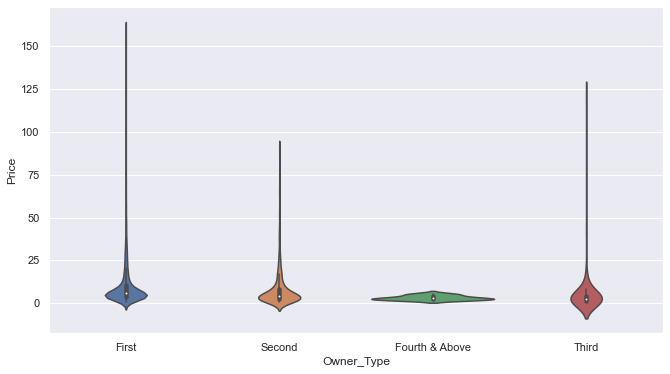

In [ ]:
sns.violinplot(cars['Owner_Type'], cars['Price'])
# First hand owner car sales have higher range of sale prices compared to other owner types

In [ ]:
cars.groupby('Year').Price.median()

# Most recent years have higher median prices

Year
1996       NaN
1998     0.690
1999     0.835
2000     1.100
2001     0.875
2002     1.200
2003     1.250
2004     1.400
2005     1.300
2006     1.750
2007     2.000
2008     2.535
2009     3.100
2010     3.000
2011     3.830
2012     4.500
2013     5.000
2014     5.750
2015     6.215
2016     6.990
2017     8.200
2018     8.755
2019    11.520
Name: Price, dtype: float64

In [ ]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7078 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
 13  Brand              7253 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 793.4+ KB


#### DATA PREPROCESSING ##########

a) Attributes such as  Mileage, Power , Engine have strings at the end of their values.  Drop the extra characters
b) Attribute New Price has different units : LAkh and crores, which need to be converted to a common unit Lakh
c) Treatment for outliers.
d) Treatment for missing values.

In [ ]:
# Mileage has inconsistent values.  Based on FAQ's kmpl and km/kg represent same values.
cars['Mileage'].str.split(' ').str[1].value_counts()
 

kmpl     7177
km/kg      74
Name: Mileage, dtype: int64

In [ ]:
# Check if there are strings at the end of Engine variable
# remove the value CC at the end of Engine variable
cars['Engine'].str.split(' ').str[1].value_counts()



CC    7207
Name: Engine, dtype: int64

In [ ]:
# check if there are strings at the end of power variable
# REmove the value bhp at the end of variable
cars['Power'].str.split(' ').str[1].value_counts()

bhp    7078
Name: Power, dtype: int64

In [ ]:
# Get the numeric values and store them in separate variable

cars['Mileage_fmt'] = cars['Mileage'].str.split(' ').str[0].astype('float64')
cars['Engine_fmt'] = cars['Engine'].str.split(' ').str[0].astype('float64')
cars['Power_fmt']  = cars['Power'].str.split(' ').str[0].astype('float64')


In [ ]:
# verify that the new columns are numeric
cars['Mileage_fmt'].head()

0    26.60
1    19.67
2    18.20
3    20.77
4    15.20
Name: Mileage_fmt, dtype: float64

In [ ]:
# validate that the new variable is numeric 
cars['Engine_fmt'].head()

0     998.0
1    1582.0
2    1199.0
3    1248.0
4    1968.0
Name: Engine_fmt, dtype: float64

In [ ]:
# Validate that the new variable is numeric.
cars['Power_fmt'].head()

0     58.16
1    126.20
2     88.70
3     88.76
4    140.80
Name: Power_fmt, dtype: float64

In [ ]:
# Drop the unformatted variables
cars.drop('Engine',axis=1, inplace=True)
cars.drop('Power',axis=1, inplace=True)
cars.drop('Mileage',axis=1, inplace=True)
cars.head()
# check for missing data in new field


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,Brand,Mileage_fmt,Engine_fmt,Power_fmt
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,5.0,NaN,1.75,Maruti Wagon,26.60,998.0,58.16
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,5.0,NaN,12.50,Hyundai Creta,19.67,1582.0,126.20
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,5.0,8.61 Lakh,4.50,Honda Jazz,18.20,1199.0,88.70
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,7.0,NaN,6.00,Maruti Ertiga,20.77,1248.0,88.76
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,NaN,17.74,Audi A4,15.20,1968.0,140.80


In [ ]:
# convert Seats to a categorical variable.
cars['Seats']= cars['Seats'].astype('str')

In [ ]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Seats              7253 non-null   object 
 8   New_Price          1006 non-null   object 
 9   Price              6019 non-null   float64
 10  Brand              7253 non-null   object 
 11  Mileage_fmt        7251 non-null   float64
 12  Engine_fmt         7207 non-null   float64
 13  Power_fmt          7078 non-null   float64
dtypes: float64(4), int64(2), object(8)
memory usage: 793.4+ KB


In [ ]:
# standardize the field new_Price, by convert "cr" to "lakh" and keeping only numeric part
cars['New_Price'].str.split(' ').str[1].value_counts()


Lakh    986
Cr       20
Name: New_Price, dtype: int64

In [ ]:
# Determine a multiplier based on whether the field contains Cr or Lakh.
# Translate all values into a single unit.

def price_convert(New_Price):
  
    multiplier=np.NaN
    if New_Price.endswith('Cr'):
        multiplier=100
    elif New_Price.endswith('Lakh'):
        multiplier=1
    return multiplier
        
cars['New_price_fmt_mult'] = cars['New_Price'].astype('str').apply(price_convert)
cars['New_price_fmt'] = cars['New_Price'].str.split(' ').str[0].astype('float') * cars['New_price_fmt_mult']


In [ ]:
chk = cars[ ["New_Price", "New_price_fmt"]]
chk.shape

# perform validation;
# After this point : fields "New_price", "New_price_fmt_mult" can be dropped.

(7253, 2)

In [ ]:
chk[chk["New_Price"].str.contains("Lakh",na=False)].head()

,New_Price,New_price_fmt
2,8.61 Lakh,8.61
7,21 Lakh,21.00
10,10.65 Lakh,10.65
15,32.01 Lakh,32.01
20,47.87 Lakh,47.87


In [ ]:
# validate that the new price fmt has been implemented correctly. For crores the price should be multiplied by 100.
chk[chk["New_Price"].str.contains("Cr",na=False)].head()

,New_Price,New_price_fmt
148,1.28 Cr,128.0
327,1.04 Cr,104.0
489,1 Cr,100.0
1336,1.04 Cr,104.0
1505,1.39 Cr,139.0


In [ ]:
cars.drop("New_Price", axis=1, inplace=True)
cars.drop("New_price_fmt_mult", axis=1, inplace=True)
cars.drop("Name",axis=1, inplace=True)


In [ ]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           7253 non-null   object 
 1   Year               7253 non-null   int64  
 2   Kilometers_Driven  7253 non-null   int64  
 3   Fuel_Type          7253 non-null   object 
 4   Transmission       7253 non-null   object 
 5   Owner_Type         7253 non-null   object 
 6   Seats              7253 non-null   object 
 7   Price              6019 non-null   float64
 8   Brand              7253 non-null   object 
 9   Mileage_fmt        7251 non-null   float64
 10  Engine_fmt         7207 non-null   float64
 11  Power_fmt          7078 non-null   float64
 12  New_price_fmt      1006 non-null   float64
dtypes: float64(5), int64(2), object(6)
memory usage: 736.8+ KB


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


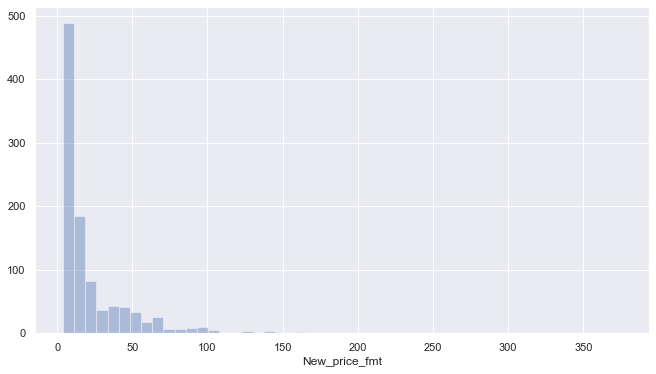

In [ ]:
sns.distplot(cars['New_price_fmt'],kde=False)
cars_unique= cars['Brand'].unique()
cars_unique.size
cars_distinct_price=cars.groupby('Brand').New_price_fmt.median().reset_index()

In [ ]:
cars['model']  = cars['Brand'].str.split(' ').str[0]
cars_tmp = cars
cars_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           7253 non-null   object 
 1   Year               7253 non-null   int64  
 2   Kilometers_Driven  7253 non-null   int64  
 3   Fuel_Type          7253 non-null   object 
 4   Transmission       7253 non-null   object 
 5   Owner_Type         7253 non-null   object 
 6   Seats              7253 non-null   object 
 7   Price              6019 non-null   float64
 8   Brand              7253 non-null   object 
 9   Mileage_fmt        7251 non-null   float64
 10  Engine_fmt         7207 non-null   float64
 11  Power_fmt          7078 non-null   float64
 12  New_price_fmt      1006 non-null   float64
 13  model              7253 non-null   object 
dtypes: float64(5), int64(2), object(7)
memory usage: 793.4+ KB


In [ ]:
tst = cars_tmp['Brand'].unique()
tst

array(['Maruti Wagon', 'Hyundai Creta', 'Honda Jazz', 'Maruti Ertiga',
       'Audi A4', 'Hyundai EON', 'Nissan Micra', 'Toyota Innova',
       'Volkswagen Vento', 'Tata Indica', 'Maruti Ciaz', 'Honda City',
       'Maruti Swift', 'Land Rover', 'Mitsubishi Pajero', 'Honda Amaze',
       'Renault Duster', 'Mercedes-Benz New', 'BMW 3', 'Maruti S',
       'Audi A6', 'Hyundai i20', 'Maruti Alto', 'Honda WRV',
       'Toyota Corolla', 'Mahindra Ssangyong', 'Maruti Vitara',
       'Mahindra KUV', 'Mercedes-Benz M-Class', 'Volkswagen Polo',
       'Tata Nano', 'Hyundai Elantra', 'Hyundai Xcent', 'Mahindra Thar',
       'Hyundai Grand', 'Renault KWID', 'Hyundai i10', 'Nissan X-Trail',
       'Maruti Zen', 'Ford Figo', 'Mercedes-Benz C-Class',
       'Porsche Cayenne', 'Mahindra XUV500', 'Nissan Terrano',
       'Honda Brio', 'Ford Fiesta', 'Hyundai Santro', 'Tata Zest',
       'Maruti Ritz', 'BMW 5', 'Toyota Fortuner', 'Ford Ecosport',
       'Hyundai Verna', 'Datsun GO', 'Maruti Omni', 'Toyot

In [ ]:
# There are 223 unique brands of cars.  creating dummy variable for such variable is not recommended. Hence drop the variable brand
cars_tmp.drop('Brand',axis=1, inplace=True)

In [ ]:
cars_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           7253 non-null   object 
 1   Year               7253 non-null   int64  
 2   Kilometers_Driven  7253 non-null   int64  
 3   Fuel_Type          7253 non-null   object 
 4   Transmission       7253 non-null   object 
 5   Owner_Type         7253 non-null   object 
 6   Seats              7253 non-null   object 
 7   Price              6019 non-null   float64
 8   Mileage_fmt        7251 non-null   float64
 9   Engine_fmt         7207 non-null   float64
 10  Power_fmt          7078 non-null   float64
 11  New_price_fmt      1006 non-null   float64
 12  model              7253 non-null   object 
dtypes: float64(5), int64(2), object(6)
memory usage: 736.8+ KB


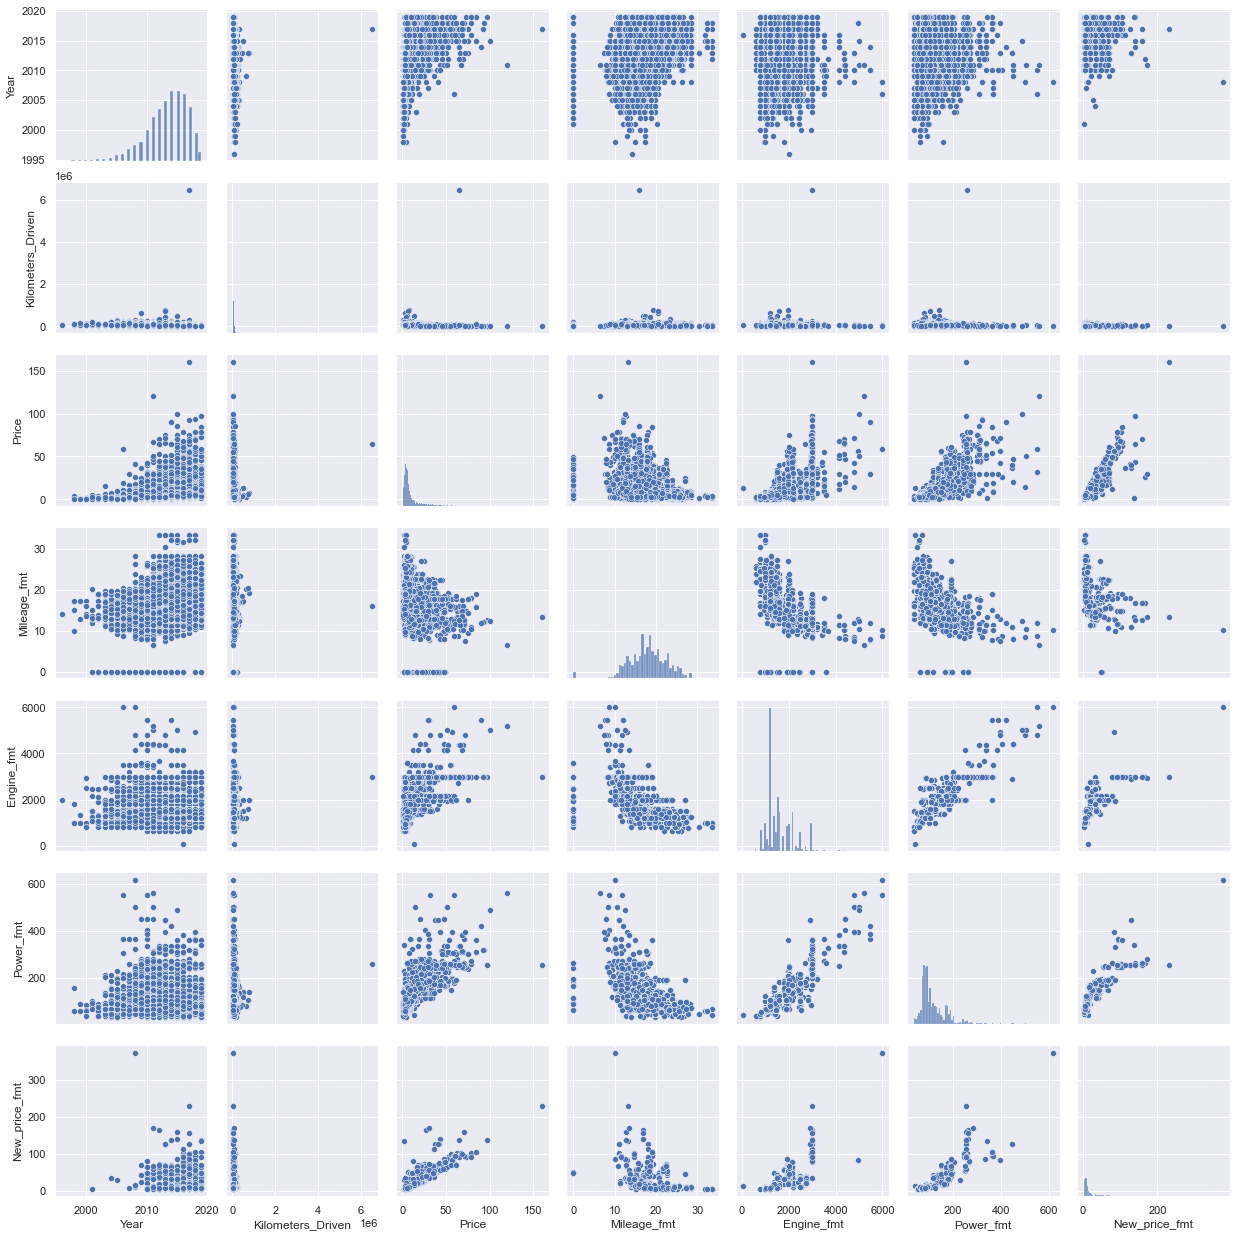

In [ ]:
sns.pairplot(cars_tmp)

##### Observations :
# Power and Engine are highly correlated.
# Power and Mileage are negatively correlated. 
# The higher the power, the higher the engine power, the lesser the mileage, # because high powered vehicles consume lot of gas 
# price and power appears to be positively correlated. Probably one of them can be dropped to improve model prediction power

In [ ]:

cars_tmp.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           7253 non-null   object 
 1   Year               7253 non-null   int64  
 2   Kilometers_Driven  7253 non-null   int64  
 3   Fuel_Type          7253 non-null   object 
 4   Transmission       7253 non-null   object 
 5   Owner_Type         7253 non-null   object 
 6   Seats              7253 non-null   object 
 7   Price              6019 non-null   float64
 8   Mileage_fmt        7251 non-null   float64
 9   Engine_fmt         7207 non-null   float64
 10  Power_fmt          7078 non-null   float64
 11  New_price_fmt      1006 non-null   float64
 12  model              7253 non-null   object 
dtypes: float64(5), int64(2), object(6)
memory usage: 736.8+ KB


##### Missing values and outlier Treatment

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price'>

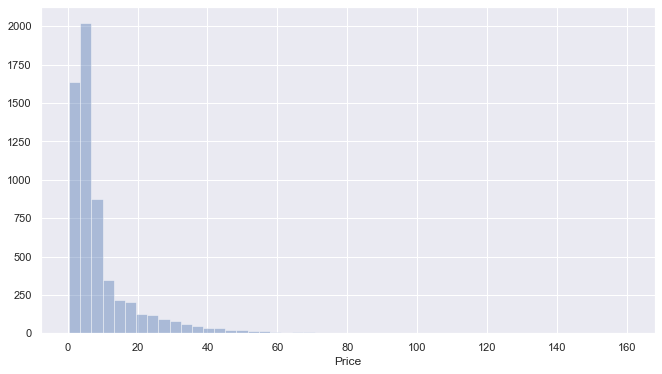

In [ ]:
sns.distplot(cars_tmp['Price'],kde=False)

<AxesSubplot:xlabel='Power_fmt'>

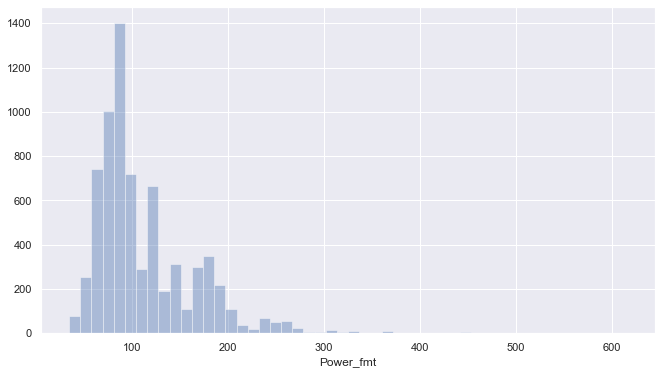

In [ ]:
sns.distplot(cars['Power_fmt'],kde=False)

<AxesSubplot:xlabel='Engine_fmt'>

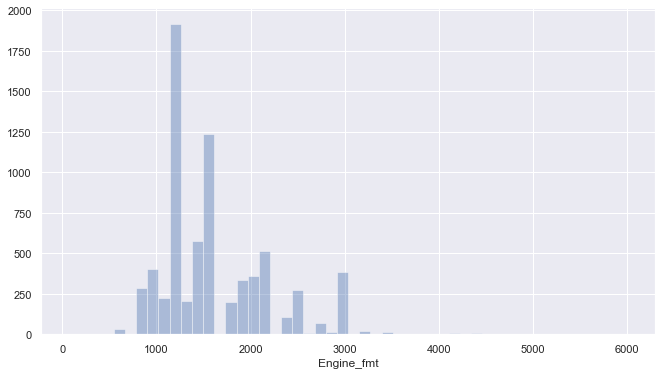

In [ ]:

sns.distplot(cars['Engine_fmt'],kde=False)



In [ ]:
# since Price values data is left skewed, use median value to impute missing values

cars_tmp['Price'].fillna(cars['Price'].mean(),inplace=True)
#since  power values data is left skewed, use median value to impute missing values
cars_tmp['Power_fmt'].fillna(cars['Power_fmt'].median(),inplace=True)
# Use mode to imput missing Engine values
cars_tmp['Engine_fmt'].fillna(cars['Engine_fmt'].median(),inplace=True)
# Use median to input missing values 
cars_tmp['New_price_fmt'].fillna(cars['New_price_fmt'].mean(), inplace=True)

In [ ]:
cars_tmp.isnull().sum()
#drop model variable


Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Seats                0
Price                0
Mileage_fmt          2
Engine_fmt           0
Power_fmt            0
New_price_fmt        0
model                0
dtype: int64

In [ ]:
# REduce dimensionality, by putting all years <=2000 into one bucket, <=2005 , into one bucket, <=2010 into one group and 
# rest all individual years into each of their own buckets

cars_tmp['yrcat'] = cars_tmp['Year'].apply( lambda x : 'LE2000' if x <=2000 else 'LE2005' if x<=2005 else 'LE2010' if x<=2010 else x)

In [ ]:
cars_tmp[ ["Year", "yrcat"]].head()

,Year,yrcat
0,2010,LE2010
1,2015,2015
2,2011,2011
3,2012,2012
4,2013,2013


In [ ]:
# Brand and Model variables can be dropped 
cars_tmp.drop('model', inplace=True,axis=1)
cars_tmp.drop('Year',inplace=True,axis=1)
cars_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           7253 non-null   object 
 1   Kilometers_Driven  7253 non-null   int64  
 2   Fuel_Type          7253 non-null   object 
 3   Transmission       7253 non-null   object 
 4   Owner_Type         7253 non-null   object 
 5   Seats              7253 non-null   object 
 6   Price              7253 non-null   float64
 7   Mileage_fmt        7251 non-null   float64
 8   Engine_fmt         7253 non-null   float64
 9   Power_fmt          7253 non-null   float64
 10  New_price_fmt      7253 non-null   float64
 11  yrcat              7253 non-null   object 
dtypes: float64(5), int64(1), object(6)
memory usage: 680.1+ KB


In [ ]:
# Apply onehot encoding for categorical variables
cars_tmp= pd.get_dummies(cars_tmp)

## Model Building
 i) Divide the population into test train split 
ii) Fit the model on train 
iii) Interpret the variance or explanatory power of model
iv) Identify the key attributes that significantly influence  the model

In [ ]:
# drop the  rows with missing values.

cars_final = cars_tmp
cars_final=cars_final.dropna(axis=0)
# Since Engine and power are very closely correlated, drop Engine variable to avoid any multicollinearity
cars_final.drop('Engine_fmt',axis=1, inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
cars_final.info()
cars_final.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7251 entries, 0 to 7252
Data columns (total 49 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Kilometers_Driven          7251 non-null   int64  
 1   Price                      7251 non-null   float64
 2   Mileage_fmt                7251 non-null   float64
 3   Power_fmt                  7251 non-null   float64
 4   New_price_fmt              7251 non-null   float64
 5   Location_Ahmedabad         7251 non-null   uint8  
 6   Location_Bangalore         7251 non-null   uint8  
 7   Location_Chennai           7251 non-null   uint8  
 8   Location_Coimbatore        7251 non-null   uint8  
 9   Location_Delhi             7251 non-null   uint8  
 10  Location_Hyderabad         7251 non-null   uint8  
 11  Location_Jaipur            7251 non-null   uint8  
 12  Location_Kochi             7251 non-null   uint8  
 13  Location_Kolkata           7251 non-null   uint8

(7251, 49)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# split the population into a 70:30 train test split

x = cars_final.drop('Price',axis=1)
y = cars_final['Price']

In [ ]:
x_train, x_test , y_train, y_test  = train_test_split(x,y, test_size=0.30, random_state=1)

In [ ]:
reg = LinearRegression().fit(x_train,y_train)

In [ ]:
#print variable names and the coefficients 

list_coeff_var= list(zip(reg.coef_, x_train))

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

reg.score(x_train, y_train)

# The model explanatory power is 63.52%. This is considered to be a decent model but not a best fit model.

0.6352704074834674

In [ ]:
# List the coefficients with variable name.
list_coeff_var.sort(reverse=True)
list_coeff_var

[(13.857492502151526, 'Seats_2.0'),
 (5.615786934322587, 'yrcat_2019'),
 (4.84319452566889, 'yrcat_2018'),
 (3.2591081132603663, 'yrcat_2017'),
 (1.949183648139174, 'yrcat_2016'),
 (1.6808612727315078, 'Seats_4.0'),
 (1.6520563592269146, 'Fuel_Type_LPG'),
 (1.4408847946225287, 'Location_Bangalore'),
 (1.0572416387450867, 'yrcat_2015'),
 (0.9550646687540395, 'Transmission_Automatic'),
 (0.8743826916739027, 'Location_Hyderabad'),
 (0.8293101439504138, 'Location_Coimbatore'),
 (0.7697489190187372, 'Seats_10.0'),
 (0.6066009296088145, 'Location_Chennai'),
 (0.4623183845712183, 'Owner_Type_First'),
 (0.33828647034162884, 'Fuel_Type_Diesel'),
 (0.30552250711250045, 'Owner_Type_Third'),
 (0.18283461976941986, 'Location_Pune'),
 (0.16808797660122898, 'Owner_Type_Second'),
 (0.15987265095488873, 'New_price_fmt'),
 (0.09864704897645508, 'Power_fmt'),
 (0.09683375520147312, 'Location_Jaipur'),
 (0.05953506287473101, 'Fuel_Type_CNG'),
 (2.886579864025407e-15, 'Fuel_Type_Electric'),
 (-3.5527136788

# Interpreting the coefficients by variable 

Manufacturing year : Recent manufacturing year cars positively increase the used car sale price. 

Location: cars sold in Hyderabad and Coimbatore have higher positive coefficients indicating higher used car sale prices than the rest of cities. On the opposite end, cars sold in Kolkata  have lower prices. 

Transmission type:  Automatic Transmission cars have better price coefficients compared to manual transmission.

Fuel Type:  LPG  cars have higher sale price compared to   Electric and other fuel types

Seats: 2 seater cars have higher coefficients. Typically these are sports cars.

Kilometers driven : Number of kilometers driven negatively affect the used car price

Power:  Power increases the value of  price positively

Engine : Engine coefficient is nearly zero. It doesn’t significantly change the price of car.

In [ ]:
# Look at intercept 

reg.intercept_

1.861674008433316

In [ ]:
# Calculate Mean squared error.

y_predict=reg.predict(x_test)
mean_squared_error(y_test, y_predict, squared=False)

# Low mean squared error is good indication.

7.297954340632292

In [ ]:
# print the first 10 predicted values
y_predict[0:10]

array([12.1103379 ,  3.762732  , -3.24991665,  7.05476735,  5.21952825,
        7.91017135, 23.37593026, 17.23989158,  9.93597798,  3.62244725])

In [ ]:
# compare them against actual values of used car prices using test dataset. 
y_test[0:10]

5044    11.000000
7026     9.479468
2781     1.550000
3658     4.400000
2868     5.750000
3780     4.000000
186     32.000000
305     20.770000
3203     8.950000
3451     4.400000
Name: Price, dtype: float64

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_predict)

# Low mean absolute error is good indicator

3.7966251903705834

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


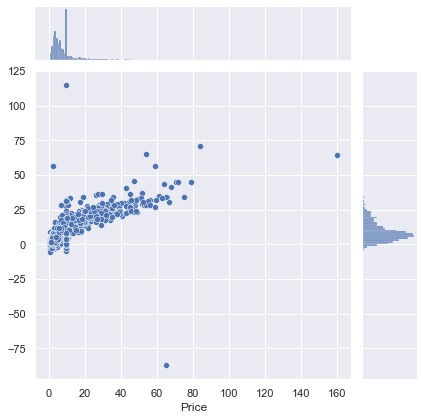

In [ ]:
sns.jointplot(y_test,y_predict)
# plot between y_test and y_predict. 
# there are few outliers that appear to cause higher differences between predicted and actual values

In [ ]:
#Plotting  Price predicted against price actuals reveals outliers. While both are corelated, 
#there are outliers are causing the predictions to be off.